In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,dct
import librosa
from scipy import signal
import soundfile as sf
import librosa.display
from scipy.fftpack import dct
from scipy.signal import hamming

### 1. Mel filterbank (1 point)

#### a) Load the given audio file

In [2]:
audio_path = 'audio.wav'
y, sr1 = librosa.load(audio_path)

#### b) Create a mel filterbank using librosa

In [3]:
sr = sr1 # from a)
N_fft = 512
N_mel = 40
mel_filterbank = librosa.filters.mel(sr=sr, n_fft=N_fft, n_mels=N_mel)

#### c) Plot the mel filterbank

Text(0, 0.5, 'Mel frequency')

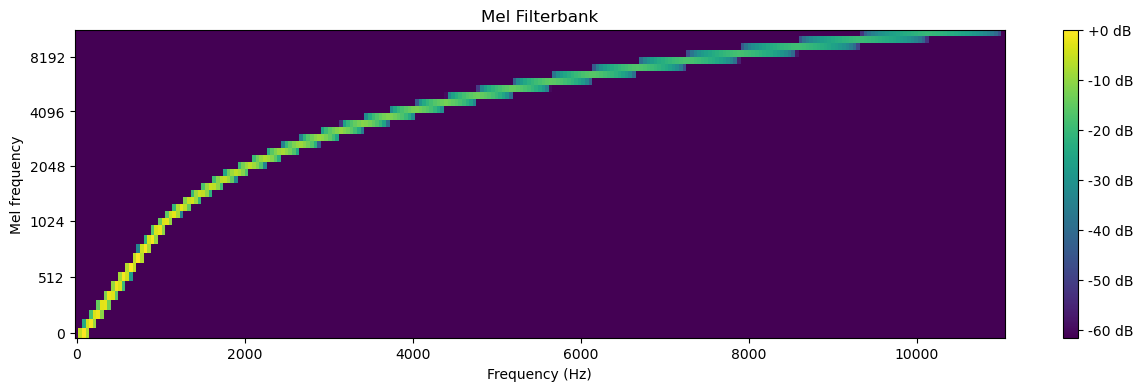

In [4]:
plt.figure(figsize=(15, 4))

# Display the filterbank using librosa.display.specshow
librosa.display.specshow(librosa.amplitude_to_db(mel_filterbank, ref=np.max),
                         y_axis='mel', x_axis='linear', sr=sr,
                         hop_length=N_fft // 2, cmap='viridis')

plt.colorbar(format='%+2.0f dB')
plt.title('Mel Filterbank')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Mel frequency')

#### Report your observations

In [ ]:
The Mel scale, represents the human ear sensitivity to different frequencies.The spacing between frequencies, specifically up 
to 2 kHz, strongly aligns with actual variations in pitch. As the frequencies reach 2 kHz, the gap between them becomes wider.

### 2. MFCC (1 point)

#### a) Pre-emphasis the audio signal

In [5]:
file_path = 'audio.wav'
audio_signal, sampling_rate = librosa.load(file_path)

# a) Pre-emphasis
pre_emphasis = 0.97
s_ = np.append(audio_signal[0], audio_signal[1:] - pre_emphasis * audio_signal[:-1])

#### b) Implement a stft loop for each frame 

In [42]:
n_fft = 512
n_mel = 40
n_frames = len(audio_signal) // (n_fft // 2) - 1 
# Mel filterbank
mel_filterbank = librosa.filters.mel(sr=sampling_rate, n_fft=N_fft, n_mels=N_mel)

# Initialize arrays
power_spectro = np.zeros((n_fft // 2 + 1, n_frames), dtype=np.float32)
mel_spectrogram = (power_spectro)[:n_fft // 2 + 1]
log_mel_spectrum = np.zeros((n_mel, n_frames), dtype=np.float32)
mfccs = np.zeros((n_mel, n_frames), dtype=np.float32)

for i in np.arange(0,n_frames):   
    s_seg = s_[i * (n_fft // 2): (i + 1) * (n_fft // 2 + 1)]        
    s_win_seg =  s_seg * hamming(len(s_seg)) # Window each frame using hamming window    
    spectrum  = np.fft.fft(s_win_seg) # Calculate fft
    spectrum=spectrum[:n_fft//2+1] 
    power_spectrum = np.abs(spectrum) ** 2 # Collect the power spectrum
    power_spectro[:,i] = power_spectrum[:n_fft // 2 + 1] 
    mel_spectro= np.dot(mel_filterbank, power_spectrum) # Multiply it with the mel filterbank 
    log_mel_spectrum[:,i] = 20 * np.log10((mel_spectro)[:n_fft // 2 + 1]) # Take log operation
    mfcc = dct(log_mel_spectrum, type=2, axis=0, norm='ortho') # Apply DCT
        

#### c.1) Plot logarithmic power spectrogram

Text(0.5, 1.0, 'Logarithmic Power Spectrogram')

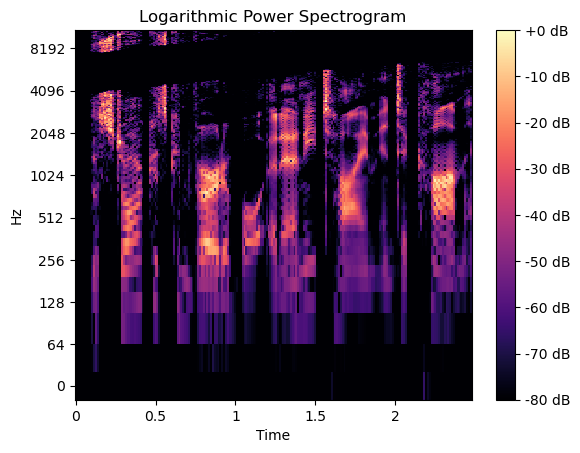

In [7]:

librosa.display.specshow(librosa.amplitude_to_db(power_spectro, ref=np.max), sr=sampling_rate, hop_length=n_fft // 2, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Logarithmic Power Spectrogram')

#### c.2) Plot mel spectrogram

Text(0.5, 1.0, 'Mel Spectrum')

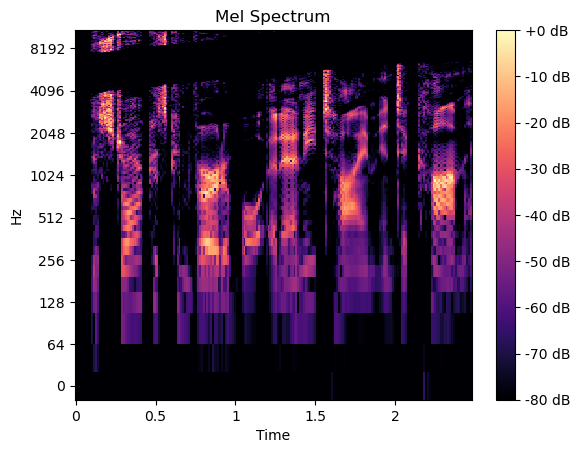

In [38]:
librosa.display.specshow(librosa.amplitude_to_db(mel_spectrogram, ref=np.max), sr=sampling_rate, hop_length=n_fft // 2, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrum')

#### c.3) Plot logarithmic mel spectrogram

Text(0.5, 1.0, 'Logarithmic Mel Spectrogram')

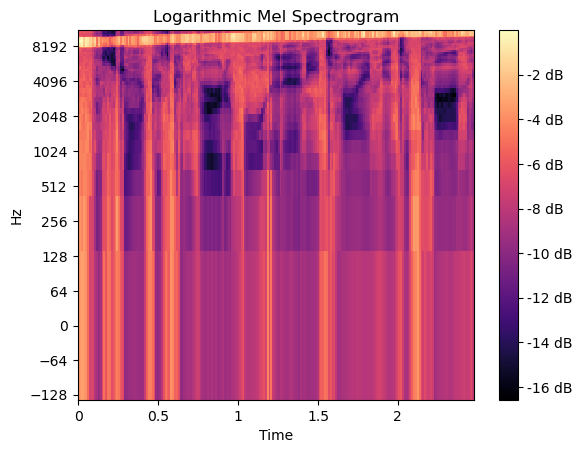

In [43]:

librosa.display.specshow(librosa.amplitude_to_db(log_mel_spectrum, ref=np.max), sr=sampling_rate, hop_length=n_fft // 2, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Logarithmic Mel Spectrogram')

#### c.4) Plot MFCC

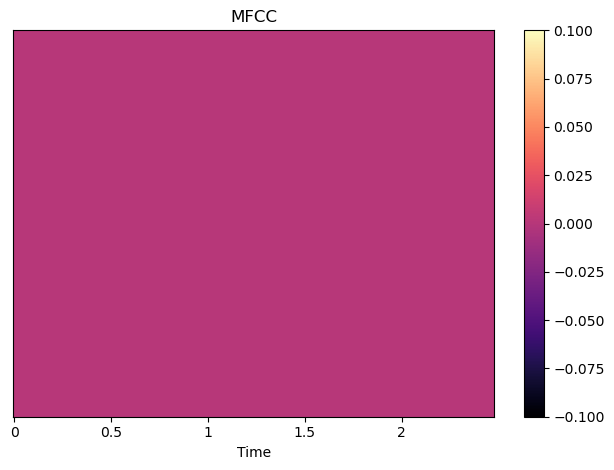

In [26]:
librosa.display.specshow(mfccs, sr=sampling_rate, hop_length=n_fft // 2, x_axis='time')
plt.colorbar()
plt.title('MFCC')

plt.tight_layout()
plt.show()

#### d) Implement MFCC using librosa

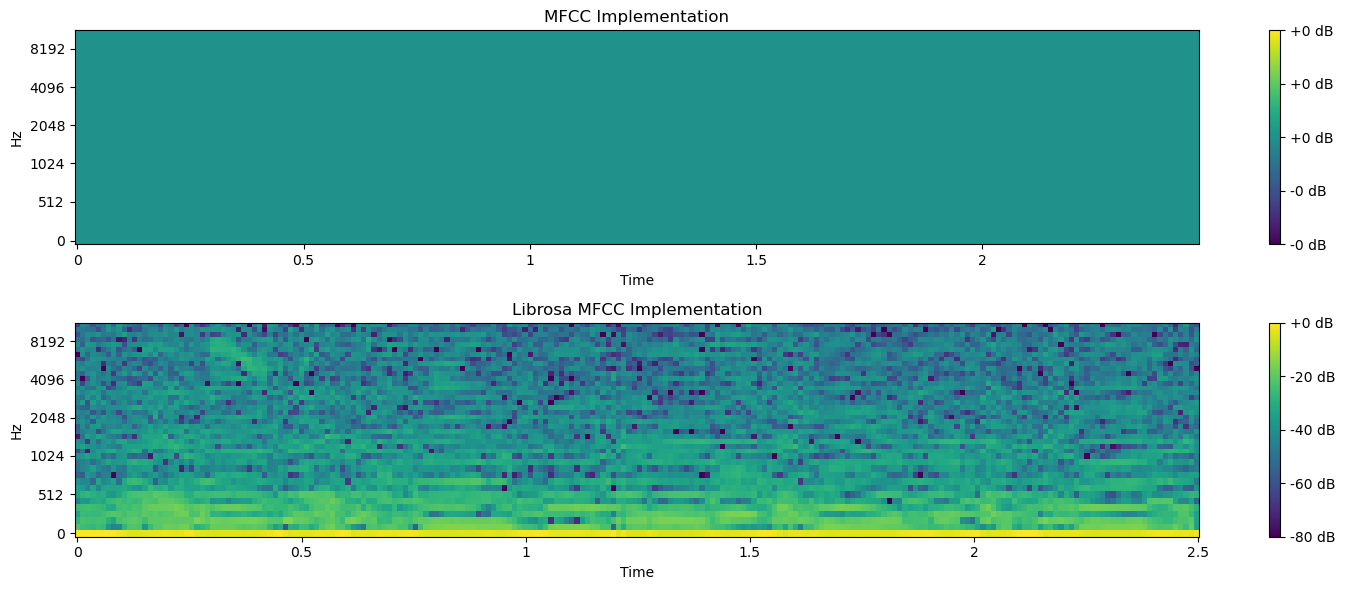

In [52]:
librosa_mfccs = librosa.feature.mfcc(y=s_, sr=sr, n_mfcc=N_mel, n_fft=n_fft, hop_length=hop_length)

# Compare the results
plt.figure(figsize=(15, 6))

plt.subplot(2, 1, 1)
librosa.display.specshow(mfccs, y_axis='mel', x_axis='time', sr=sr, hop_length=hop_length, cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC Implementation')

plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(librosa_mfccs, ref=np.max),
                         y_axis='mel', x_axis='time', sr=sr, hop_length=hop_length, cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Librosa MFCC Implementation')

plt.tight_layout()
plt.show()

#### Report your observations

In [ ]:
The MFCC uses the MEL scale to divide the frequency band to sub-bands and then extracts the Cepstral Coefficients using 
discrete cosine transform .But librosa MFCCs consider   number of frames, hop length, number of MFCCs and sampling rates 
it give better representations. 

### Bonus problem: Implement your own mel filterbank.